In [67]:
import matplotlib as plt
from matplotlib import pyplot as plt
import numpy as np
import fastf1
import fastf1.plotting
import pandas as pd
import seaborn as sb


In [4]:
fastf1.plotting.setup_mpl()

In [30]:
session = fastf1.get_session(2019, 'Monza', 'Q')
telemetry = fastf1.
fastf1.Cache.enable_cache('./fastf1-cache')


In [10]:
# session.load()
# fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
# lec_car_data = fast_leclerc.get_car_data()
# t = lec_car_data['Time']
# vCar = lec_car_data['Speed']

# # The rest is just plotting
# fig, ax = plt.subplots()
# ax.plot(t, vCar, label='Fast')
# ax.set_xlabel('Time')
# ax.set_ylabel('Speed [Km/h]')
# ax.set_title('Leclerc is')
# ax.legend()
# plt.show()

In [31]:
session.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


In [51]:
telem = session.car_data
telem

{'16':                          Date  ...            SessionTime
 0     2019-09-07 12:45:02.230  ... 0 days 00:00:01.137000
 1     2019-09-07 12:45:02.470  ... 0 days 00:00:01.377000
 2     2019-09-07 12:45:02.710  ... 0 days 00:00:01.617000
 3     2019-09-07 12:45:02.990  ... 0 days 00:00:01.897000
 4     2019-09-07 12:45:03.230  ... 0 days 00:00:02.137000
 ...                       ...  ...                    ...
 23138 2019-09-07 14:18:27.837  ... 0 days 01:33:26.744000
 23139 2019-09-07 14:18:28.076  ... 0 days 01:33:26.983000
 23140 2019-09-07 14:18:28.316  ... 0 days 01:33:27.223000
 23141 2019-09-07 14:18:28.517  ... 0 days 01:33:27.424000
 23142 2019-09-07 14:18:28.757  ... 0 days 01:33:27.664000
 
 [23143 rows x 10 columns],
 '44':                          Date  ...            SessionTime
 0     2019-09-07 12:45:02.230  ... 0 days 00:00:01.137000
 1     2019-09-07 12:45:02.470  ... 0 days 00:00:01.377000
 2     2019-09-07 12:45:02.710  ... 0 days 00:00:01.617000
 3     2019-09

In [58]:
print(telem.get('16'))

                         Date  ...            SessionTime
0     2019-09-07 12:45:02.230  ... 0 days 00:00:01.137000
1     2019-09-07 12:45:02.470  ... 0 days 00:00:01.377000
2     2019-09-07 12:45:02.710  ... 0 days 00:00:01.617000
3     2019-09-07 12:45:02.990  ... 0 days 00:00:01.897000
4     2019-09-07 12:45:03.230  ... 0 days 00:00:02.137000
...                       ...  ...                    ...
23138 2019-09-07 14:18:27.837  ... 0 days 01:33:26.744000
23139 2019-09-07 14:18:28.076  ... 0 days 01:33:26.983000
23140 2019-09-07 14:18:28.316  ... 0 days 01:33:27.223000
23141 2019-09-07 14:18:28.517  ... 0 days 01:33:27.424000
23142 2019-09-07 14:18:28.757  ... 0 days 01:33:27.664000

[23143 rows x 10 columns]


In [60]:
df = pd.DataFrame(telem.get('16'))
df

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2019-09-07 12:45:02.230,0,0,0,0,False,0,car,0 days 00:00:01.137000,0 days 00:00:01.137000
1,2019-09-07 12:45:02.470,0,0,0,0,False,0,car,0 days 00:00:01.377000,0 days 00:00:01.377000
2,2019-09-07 12:45:02.710,0,0,0,0,False,0,car,0 days 00:00:01.617000,0 days 00:00:01.617000
3,2019-09-07 12:45:02.990,0,0,0,0,False,0,car,0 days 00:00:01.897000,0 days 00:00:01.897000
4,2019-09-07 12:45:03.230,0,0,0,0,False,0,car,0 days 00:00:02.137000,0 days 00:00:02.137000
...,...,...,...,...,...,...,...,...,...,...
23138,2019-09-07 14:18:27.837,0,0,0,104,True,8,car,0 days 01:33:26.744000,0 days 01:33:26.744000
23139,2019-09-07 14:18:28.076,0,0,0,104,True,8,car,0 days 01:33:26.983000,0 days 01:33:26.983000
23140,2019-09-07 14:18:28.316,0,0,0,104,True,8,car,0 days 01:33:27.223000,0 days 01:33:27.223000
23141,2019-09-07 14:18:28.517,0,0,0,104,True,8,car,0 days 01:33:27.424000,0 days 01:33:27.424000


In [64]:
df.to_csv("./telem-csv/telem.csv",index=False)

In [76]:
indices = np.array(df.index.values)
RPM = np.array(df.RPM)

<AxesSubplot:>

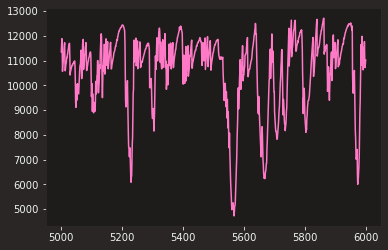

In [81]:
sb.lineplot(x=indices[5000:6000], y=RPM[5000:6000])

numpy.ndarray

## Make sure to create functions to feed the telemetry data in real time

Use MIT Motorsports ParseCAN